In [1]:
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display, clear_output
import time
%matplotlib inline
import os
import xmitgcm

import xarray as xr

#from pyspec import spectrum as spec

#from aux_func import *
#import aux_func_3dfields as my


import os
from glob import glob
%matplotlib inline
from matplotlib.colors import LogNorm
import dask
from dask.diagnostics import ProgressBar
from xgcm import Grid


In [2]:
plt.rcParams.update({'font.size': 16
    , 'legend.markerscale': 1., 'axes.titlesize': 16, 'axes.labelsize' : 16,
      'legend.fontsize' : 14,'legend.handlelength': 3})

plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

color2 = '#6495ed'
color1 = '#ff6347'
color5 = '#8470ff'
color3 = '#3cb371'
color4 = '#ffd700'
color6 = '#ba55d3'


colors1 = 'royalblue'
colors2 = 'saddlebrown'
colors3 = 'darkcyan'
colors4 = 'tomato'
colors5 = 'forestgreen'
colors6 = 'mediumorchid'
colors7 = 'darkorange'
colors8 = 'lightcoral'
colors9 = 'firebrick'
colors10 = 'goldenrod'
colors11 = 'darkgrey'
colors12 = 'indianred'

lw=3
aph=.15

plt.rcParams['figure.figsize'] = (10,7)

In [10]:
psd_h = xr.open_dataset('/swot/SUM02/as4479/fr_psd_45s_h.nc')
psd_d = xr.open_dataset('/swot/SUM02/as4479/fr_psd_45s_d2.nc')
psd_w = xr.open_dataset('/swot/SUM02/as4479/fr_psd_45s_w2.nc')
#psd_d = xr.open_dataset('/swot/SUM02/as4479/fr_psd_45s_d.nc')
#psd_w = xr.open_dataset('/swot/SUM02/as4479/fr_psd_45s_w.nc')

In [11]:
def plus_minus_sd(arr):
    arr_m = np.log10(np.mean(arr,axis=0))
    arr_sd = np.std(np.log10(arr),axis=0)
    arr_l = arr_m - arr_sd
    arr_u = arr_m + arr_sd
    return (arr_m, arr_l, arr_u)

In [12]:
ylim=[1e-3,1e5]
xlim=[3e-7, 1e-4]


lat = -45.0
    
omega = 7.2921e-5
f_freq = np.abs((2 * omega) * np.sin(np.radians(lat)) / (2*np.pi))
    
m2_freq = (12.4206012 * (60*60))**-1
m4_freq = (6.210300601* (60*60))**-1
m6_freq = (4.140200401* (60*60))**-1
day_freq = (24*60*60.)**-1
week_freq = (7*24*60*60.)**-1

hour_freq = (60*60.)**-1

psd_cw_zonmean_h = psd_h.psd_cw.mean(dim=['XC'])
psd_ccw_zonmean_h = psd_h.psd_ccw.mean(dim=['XC'])

psd_cw_std_h = psd_h.psd_cw.std(dim=['XC'])
psd_ccw_std_h = psd_h.psd_ccw.std(dim=['XC'])

psd_cw_p_h = psd_h.psd_cw.max(dim=['XC'])
psd_ccw_p_h = psd_h.psd_ccw.max(dim=['XC'])

psd_cw_m_h = psd_h.psd_cw.min(dim=['XC'])
psd_ccw_m_h = psd_h.psd_ccw.min(dim=['XC'])


psd_cw_zonmean_d = psd_d.psd_cw.mean(dim=['XC'])
psd_ccw_zonmean_d = psd_d.psd_ccw.mean(dim=['XC'])

psd_cw_std_d = psd_d.psd_cw.std(dim=['XC'])
psd_ccw_std_d = psd_d.psd_ccw.std(dim=['XC'])


psd_cw_p_d = psd_d.psd_cw.max(dim=['XC'])
psd_ccw_p_d = psd_d.psd_ccw.max(dim=['XC'])

psd_cw_m_d = psd_d.psd_cw.min(dim=['XC'])
psd_ccw_m_d = psd_d.psd_ccw.min(dim=['XC'])


psd_cw_zonmean_w = psd_w.psd_cw.mean(dim=['XC'])
psd_ccw_zonmean_w = psd_w.psd_ccw.mean(dim=['XC'])

psd_cw_std_w = psd_w.psd_cw.std(dim=['XC'])
psd_ccw_std_w = psd_w.psd_ccw.std(dim=['XC'])


psd_cw_p_w = psd_w.psd_cw.max(dim=['XC'])
psd_ccw_p_w = psd_w.psd_ccw.max(dim=['XC'])

psd_cw_m_w = psd_w.psd_cw.min(dim=['XC'])
psd_ccw_m_w = psd_w.psd_ccw.min(dim=['XC'])

In [13]:
figdir = 'Figs_Freq_pow_spec_new/'

/home/as4479/new_miniconda/miniconda/envs/pangeo/lib/python3.6/site-packages/matplotlib/scale.py:114: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


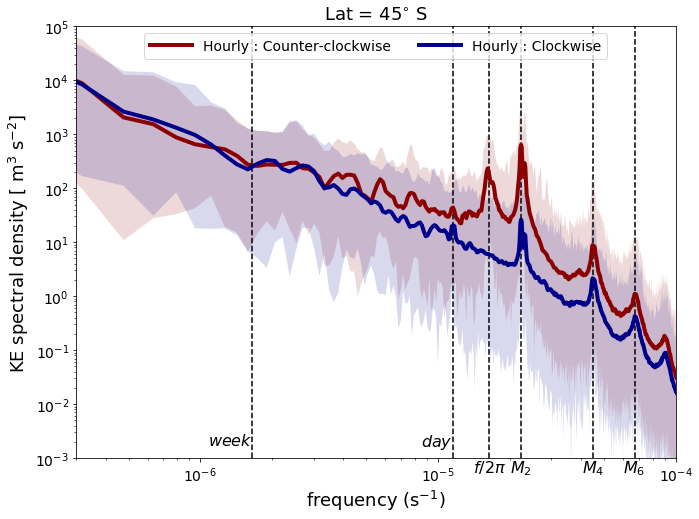

In [14]:
fig, ax = plt.subplots(figsize=(10,7.5))

colors3 =['darkblue','darkred', 'darkgreen']


psd_ccw_zonmean_h.plot(ax=ax, linewidth=4, color='darkred', label='Hourly : Counter-clockwise',rasterized=True)
ax.fill_between(psd_h.psd_ccw.freq_time, psd_ccw_p_h, psd_ccw_m_h, edgecolor=None, facecolor='darkred', alpha=0.15, rasterized=True)

psd_cw_zonmean_h.plot(ax=ax, linewidth=4, color='darkblue', label='Hourly : Clockwise', rasterized=True)
ax.fill_between(psd_h.psd_cw.freq_time, psd_cw_p_h, psd_cw_m_h, edgecolor=None, facecolor='darkblue', alpha=0.15, rasterized=True )


ax.set_xscale('log')
ax.set_xlim(xlim)
ax.set_yscale('log')
ax.set_ylim(ylim)

lg = plt.legend(loc='upper center',ncol=2)

#ax.legend(loc='upper center', fontsize=13)
lg.draw_frame(True)
   
ax.vlines([week_freq, day_freq, f_freq, m2_freq, m4_freq, m6_freq], ylim[0], ylim[1], linestyle='dashed',rasterized=True)

ax.set_xlabel('frequency (s$^{-1}$)', fontsize = 18)
ax.set_ylabel(u'KE spectral density [ m$^{3}$ s$^{-2}$]', fontsize = 18)
ax.text(f_freq, ylim[0], r'$f/2\pi$', ha='center', va='top', fontsize = 16)
ax.text(m2_freq, ylim[0], r'$M_2$', ha='center', va='top', fontsize = 16)
ax.text(m4_freq, ylim[0], r'$M_4$', ha='center', va='top', fontsize = 16)
ax.text(m6_freq, ylim[0], r'$M_6$', ha='center', va='top', fontsize = 16)

ax.text(day_freq, ylim[0]+2e-3, r'$day$', ha='right', va='top', fontsize = 16)
ax.text(week_freq, ylim[0]+2e-3, r'$week$', ha='right', va='top', fontsize = 16)

ax.set_title(r'Lat = $45^{\circ}$ S', fontsize = 18)
plt.tight_layout()

fig.savefig(figdir+'Freq_PowSpec_h.pdf', dpi=200)

/home/as4479/new_miniconda/miniconda/envs/pangeo/lib/python3.6/site-packages/matplotlib/scale.py:114: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


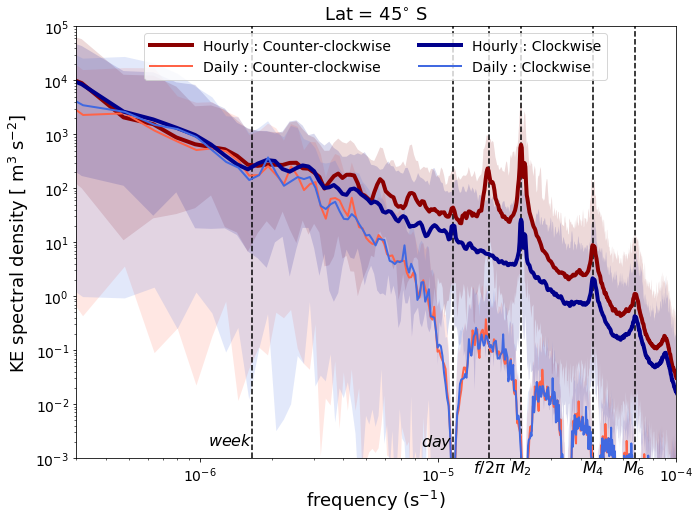

In [15]:
fig, ax = plt.subplots(figsize=(10,7.5))

colors3 =['darkblue','darkred', 'darkgreen']


psd_ccw_zonmean_h.plot(ax=ax, linewidth=4, color='darkred', label='Hourly : Counter-clockwise',rasterized=True)
ax.fill_between(psd_h.psd_ccw.freq_time, psd_ccw_p_h, psd_ccw_m_h, edgecolor=None, facecolor='darkred', alpha=0.15, rasterized=True)

psd_ccw_zonmean_d.plot(ax=ax, linewidth=2, color='tomato', label='Daily : Counter-clockwise',rasterized=True)
ax.fill_between(psd_d.psd_ccw.freq_time, psd_ccw_p_d, psd_ccw_m_d, edgecolor=None, facecolor='tomato', alpha=0.15, rasterized=True)


psd_cw_zonmean_h.plot(ax=ax, linewidth=4, color='darkblue', label='Hourly : Clockwise', rasterized=True)
ax.fill_between(psd_h.psd_cw.freq_time, psd_cw_p_h, psd_cw_m_h, edgecolor=None, facecolor='darkblue', alpha=0.15, rasterized=True)

psd_cw_zonmean_d.plot(ax=ax, linewidth=2, color='royalblue', label='Daily : Clockwise', rasterized=True)
ax.fill_between(psd_d.psd_cw.freq_time, psd_cw_p_d, psd_cw_m_d, edgecolor=None, facecolor='royalblue', alpha=0.15, rasterized=True)


ax.set_xscale('log')
ax.set_xlim(xlim)
ax.set_yscale('log')
ax.set_ylim(ylim)

lg = plt.legend(loc='upper center',ncol=2)

#ax.legend(loc='upper center', fontsize=13)
lg.draw_frame(True)
   
ax.vlines([week_freq, day_freq, f_freq, m2_freq, m4_freq, m6_freq], ylim[0], ylim[1], linestyle='dashed',rasterized=True)

ax.set_xlabel('frequency (s$^{-1}$)', fontsize = 18)
ax.set_ylabel(u'KE spectral density [ m$^{3}$ s$^{-2}$]', fontsize = 18)
ax.text(f_freq, ylim[0], r'$f/2\pi$', ha='center', va='top', fontsize = 16)
ax.text(m2_freq, ylim[0], r'$M_2$', ha='center', va='top', fontsize = 16)
ax.text(m4_freq, ylim[0], r'$M_4$', ha='center', va='top', fontsize = 16)
ax.text(m6_freq, ylim[0], r'$M_6$', ha='center', va='top', fontsize = 16)

ax.text(day_freq, ylim[0]+2e-3, r'$day$', ha='right', va='top', fontsize = 16)
ax.text(week_freq, ylim[0]+2e-3, r'$week$', ha='right', va='top', fontsize = 16)

ax.set_title(r'Lat = $45^{\circ}$ S', fontsize = 18)
plt.tight_layout()

fig.savefig(figdir+'Freq_PowSpec_hd2.pdf', dpi=200)

/home/as4479/new_miniconda/miniconda/envs/pangeo/lib/python3.6/site-packages/matplotlib/scale.py:114: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


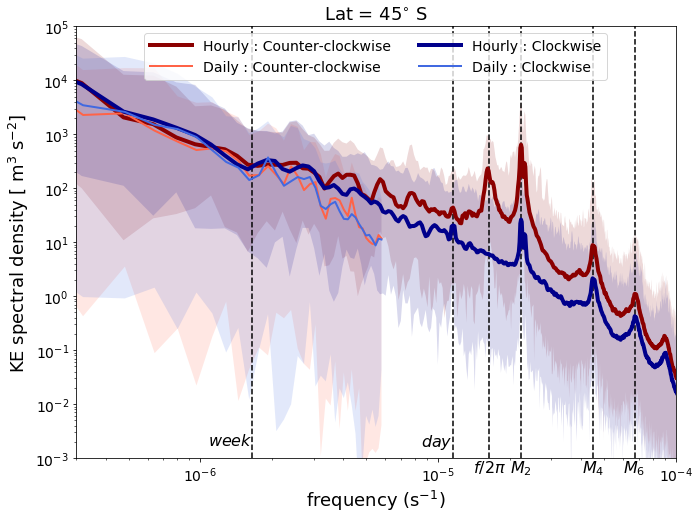

In [43]:
fig, ax = plt.subplots(figsize=(10,7.5))

colors3 =['darkblue','darkred', 'darkgreen']


psd_ccw_zonmean_h.plot(ax=ax, linewidth=4, color='darkred', label='Hourly : Counter-clockwise',rasterized=True)
ax.fill_between(psd_h.psd_ccw.freq_time, psd_ccw_p_h, psd_ccw_m_h, edgecolor=None, facecolor='darkred', alpha=0.15, rasterized=True)

psd_ccw_zonmean_d.plot(ax=ax, linewidth=2, color='tomato', label='Daily : Counter-clockwise',rasterized=True)
ax.fill_between(psd_d.psd_ccw.freq_time, psd_ccw_p_d, psd_ccw_m_d, edgecolor=None, facecolor='tomato', alpha=0.15, rasterized=True)


psd_cw_zonmean_h.plot(ax=ax, linewidth=4, color='darkblue', label='Hourly : Clockwise', rasterized=True)
ax.fill_between(psd_h.psd_cw.freq_time, psd_cw_p_h, psd_cw_m_h, edgecolor=None, facecolor='darkblue', alpha=0.15, rasterized=True)

psd_cw_zonmean_d.plot(ax=ax, linewidth=2, color='royalblue', label='Daily : Clockwise', rasterized=True)
ax.fill_between(psd_d.psd_cw.freq_time, psd_cw_p_d, psd_cw_m_d, edgecolor=None, facecolor='royalblue', alpha=0.15, rasterized=True)


ax.set_xscale('log')
ax.set_xlim(xlim)
ax.set_yscale('log')
ax.set_ylim(ylim)

lg = plt.legend(loc='upper center',ncol=2)

#ax.legend(loc='upper center', fontsize=13)
lg.draw_frame(True)
   
ax.vlines([week_freq, day_freq, f_freq, m2_freq, m4_freq, m6_freq], ylim[0], ylim[1], linestyle='dashed',rasterized=True)

ax.set_xlabel('frequency (s$^{-1}$)', fontsize = 18)
ax.set_ylabel(u'KE spectral density [ m$^{3}$ s$^{-2}$]', fontsize = 18)
ax.text(f_freq, ylim[0], r'$f/2\pi$', ha='center', va='top', fontsize = 16)
ax.text(m2_freq, ylim[0], r'$M_2$', ha='center', va='top', fontsize = 16)
ax.text(m4_freq, ylim[0], r'$M_4$', ha='center', va='top', fontsize = 16)
ax.text(m6_freq, ylim[0], r'$M_6$', ha='center', va='top', fontsize = 16)

ax.text(day_freq, ylim[0]+2e-3, r'$day$', ha='right', va='top', fontsize = 16)
ax.text(week_freq, ylim[0]+2e-3, r'$week$', ha='right', va='top', fontsize = 16)

ax.set_title(r'Lat = $45^{\circ}$ S', fontsize = 18)
plt.tight_layout()

fig.savefig(figdir+'Freq_PowSpec_hd1.pdf', dpi=200)

/home/as4479/new_miniconda/miniconda/envs/pangeo/lib/python3.6/site-packages/matplotlib/scale.py:114: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


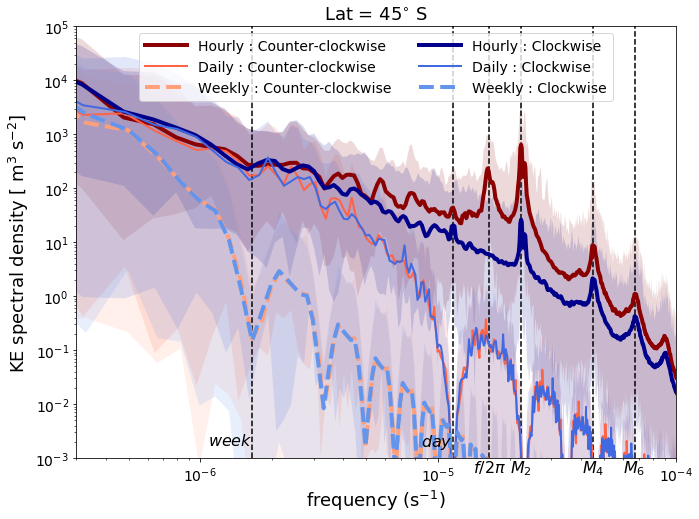

In [16]:
fig, ax = plt.subplots(figsize=(10,7.5))

colors3 =['darkblue','darkred', 'darkgreen']


psd_ccw_zonmean_h.plot(ax=ax, linewidth=4, color='darkred', label='Hourly : Counter-clockwise',rasterized=True)
ax.fill_between(psd_h.psd_ccw.freq_time, psd_ccw_p_h, psd_ccw_m_h, edgecolor=None, facecolor='darkred', alpha=0.15, rasterized=True)

psd_ccw_zonmean_d.plot(ax=ax, linewidth=2, color='tomato', label='Daily : Counter-clockwise',rasterized=True)
ax.fill_between(psd_d.psd_ccw.freq_time, psd_ccw_p_d, psd_ccw_m_d, edgecolor=None, facecolor='tomato', alpha=0.15, rasterized=True)

psd_ccw_zonmean_w.plot(ax=ax, linewidth=4, linestyle = '--',color='lightsalmon', label='Weekly : Counter-clockwise',rasterized=True)
ax.fill_between(psd_w.psd_ccw.freq_time, psd_ccw_p_w, psd_ccw_m_w, edgecolor=None, facecolor='lightsalmon', alpha=0.15, rasterized=True)


psd_cw_zonmean_h.plot(ax=ax, linewidth=4, color='darkblue', label='Hourly : Clockwise', rasterized=True)
ax.fill_between(psd_h.psd_cw.freq_time, psd_cw_p_h, psd_cw_m_h, edgecolor=None, facecolor='darkblue', alpha=0.15, rasterized=True)

psd_cw_zonmean_d.plot(ax=ax, linewidth=2, color='royalblue', label='Daily : Clockwise', rasterized=True)
ax.fill_between(psd_d.psd_cw.freq_time, psd_cw_p_d, psd_cw_m_d, edgecolor=None, facecolor='royalblue', alpha=0.15, rasterized=True)

psd_cw_zonmean_w.plot(ax=ax, linewidth=4, linestyle = '--', color='cornflowerblue', label='Weekly : Clockwise', rasterized=True)
ax.fill_between(psd_w.psd_cw.freq_time, psd_cw_p_w, psd_cw_m_w, edgecolor=None, facecolor='cornflowerblue', alpha=0.15, rasterized=True)




ax.set_xscale('log')
ax.set_xlim(xlim)
ax.set_yscale('log')
ax.set_ylim(ylim)

lg = plt.legend(loc='upper center',ncol=2)

#ax.legend(loc='upper center', fontsize=13)
lg.draw_frame(True)
   
ax.vlines([week_freq, day_freq, f_freq, m2_freq, m4_freq, m6_freq], ylim[0], ylim[1], linestyle='dashed',rasterized=True)

ax.set_xlabel('frequency (s$^{-1}$)', fontsize = 18)
ax.set_ylabel(u'KE spectral density [ m$^{3}$ s$^{-2}$]', fontsize = 18)
ax.text(f_freq, ylim[0], r'$f/2\pi$', ha='center', va='top', fontsize = 16)
ax.text(m2_freq, ylim[0], r'$M_2$', ha='center', va='top', fontsize = 16)
ax.text(m4_freq, ylim[0], r'$M_4$', ha='center', va='top', fontsize = 16)
ax.text(m6_freq, ylim[0], r'$M_6$', ha='center', va='top', fontsize = 16)

ax.text(day_freq, ylim[0]+2e-3, r'$day$', ha='right', va='top', fontsize = 16)
ax.text(week_freq, ylim[0]+2e-3, r'$week$', ha='right', va='top', fontsize = 16)

ax.set_title(r'Lat = $45^{\circ}$ S', fontsize = 18)
plt.tight_layout()

fig.savefig(figdir+'Freq_PowSpec_hdw2.pdf', dpi=200)

/home/as4479/new_miniconda/miniconda/envs/pangeo/lib/python3.6/site-packages/matplotlib/scale.py:114: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


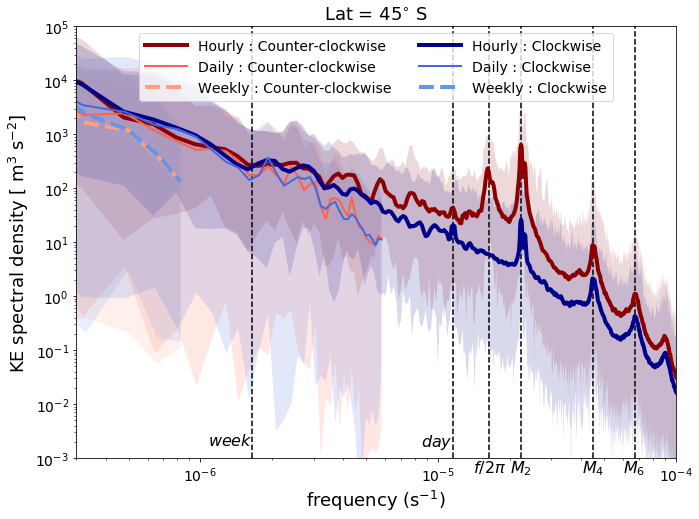

In [45]:
fig, ax = plt.subplots(figsize=(10,7.5))

colors3 =['darkblue','darkred', 'darkgreen']


psd_ccw_zonmean_h.plot(ax=ax, linewidth=4, color='darkred', label='Hourly : Counter-clockwise',rasterized=True)
ax.fill_between(psd_h.psd_ccw.freq_time, psd_ccw_p_h, psd_ccw_m_h, edgecolor=None, facecolor='darkred', alpha=0.15, rasterized=True)

psd_ccw_zonmean_d.plot(ax=ax, linewidth=2, color='tomato', label='Daily : Counter-clockwise',rasterized=True)
ax.fill_between(psd_d.psd_ccw.freq_time, psd_ccw_p_d, psd_ccw_m_d, edgecolor=None, facecolor='tomato', alpha=0.15, rasterized=True)

psd_ccw_zonmean_w.plot(ax=ax, linewidth=4, linestyle = '--',color='lightsalmon', label='Weekly : Counter-clockwise',rasterized=True)
ax.fill_between(psd_w.psd_ccw.freq_time, psd_ccw_p_w, psd_ccw_m_w, edgecolor=None, facecolor='lightsalmon', alpha=0.15, rasterized=True)


psd_cw_zonmean_h.plot(ax=ax, linewidth=4, color='darkblue', label='Hourly : Clockwise', rasterized=True)
ax.fill_between(psd_h.psd_cw.freq_time, psd_cw_p_h, psd_cw_m_h, edgecolor=None, facecolor='darkblue', alpha=0.15, rasterized=True)

psd_cw_zonmean_d.plot(ax=ax, linewidth=2, color='royalblue', label='Daily : Clockwise', rasterized=True)
ax.fill_between(psd_d.psd_cw.freq_time, psd_cw_p_d, psd_cw_m_d, edgecolor=None, facecolor='royalblue', alpha=0.15, rasterized=True)

psd_cw_zonmean_w.plot(ax=ax, linewidth=4, linestyle = '--', color='cornflowerblue', label='Weekly : Clockwise', rasterized=True)
ax.fill_between(psd_w.psd_cw.freq_time, psd_cw_p_w, psd_cw_m_w, edgecolor=None, facecolor='cornflowerblue', alpha=0.15, rasterized=True)




ax.set_xscale('log')
ax.set_xlim(xlim)
ax.set_yscale('log')
ax.set_ylim(ylim)

lg = plt.legend(loc='upper center',ncol=2)

#ax.legend(loc='upper center', fontsize=13)
lg.draw_frame(True)
   
ax.vlines([week_freq, day_freq, f_freq, m2_freq, m4_freq, m6_freq], ylim[0], ylim[1], linestyle='dashed',rasterized=True)

ax.set_xlabel('frequency (s$^{-1}$)', fontsize = 18)
ax.set_ylabel(u'KE spectral density [ m$^{3}$ s$^{-2}$]', fontsize = 18)
ax.text(f_freq, ylim[0], r'$f/2\pi$', ha='center', va='top', fontsize = 16)
ax.text(m2_freq, ylim[0], r'$M_2$', ha='center', va='top', fontsize = 16)
ax.text(m4_freq, ylim[0], r'$M_4$', ha='center', va='top', fontsize = 16)
ax.text(m6_freq, ylim[0], r'$M_6$', ha='center', va='top', fontsize = 16)

ax.text(day_freq, ylim[0]+2e-3, r'$day$', ha='right', va='top', fontsize = 16)
ax.text(week_freq, ylim[0]+2e-3, r'$week$', ha='right', va='top', fontsize = 16)

ax.set_title(r'Lat = $45^{\circ}$ S', fontsize = 18)
plt.tight_layout()

fig.savefig(figdir+'Freq_PowSpec_hdw1.pdf', dpi=200)

/home/as4479/new_miniconda/miniconda/envs/pangeo/lib/python3.6/site-packages/matplotlib/scale.py:114: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


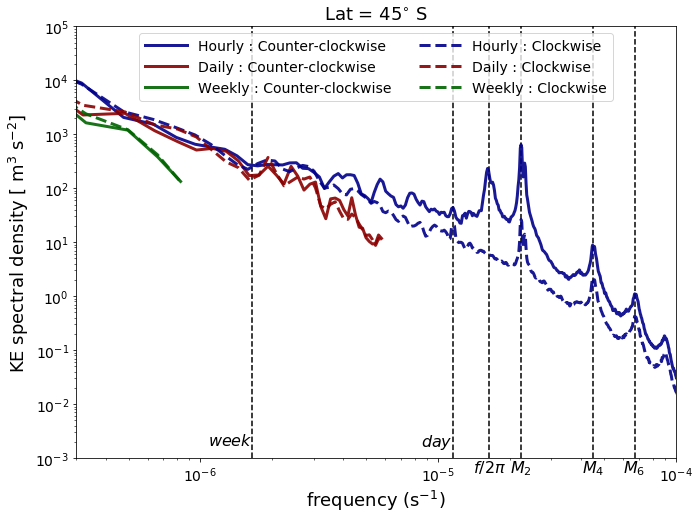

In [48]:
fig, ax = plt.subplots(figsize=(10,7.5))

colors3 =['darkblue','darkred', 'darkgreen']


psd_ccw_zonmean_h.plot(ax=ax, linewidth=3, alpha=0.9, color='darkblue', label='Hourly : Counter-clockwise',rasterized=True)

psd_ccw_zonmean_d.plot(ax=ax, linewidth=3, alpha=0.9, color='darkred', label='Daily : Counter-clockwise',rasterized=True)

psd_ccw_zonmean_w.plot(ax=ax, linewidth=3, alpha=0.9, color='darkgreen', label='Weekly : Counter-clockwise',rasterized=True)


psd_cw_zonmean_h.plot(ax=ax, linewidth=3, alpha=0.9, linestyle = '--', color='darkblue', label='Hourly : Clockwise', rasterized=True)

psd_cw_zonmean_d.plot(ax=ax, linewidth=3, alpha=0.9, linestyle = '--', color='darkred', label='Daily : Clockwise', rasterized=True)

psd_cw_zonmean_w.plot(ax=ax, linewidth=3, alpha=0.9, linestyle = '--', color='darkgreen', label='Weekly : Clockwise', rasterized=True)




ax.set_xscale('log')
ax.set_xlim(xlim)
ax.set_yscale('log')
ax.set_ylim(ylim)

lg = plt.legend(loc='upper center',ncol=2)

#ax.legend(loc='upper center', fontsize=13)
lg.draw_frame(True)
   
ax.vlines([week_freq, day_freq, f_freq, m2_freq, m4_freq, m6_freq], ylim[0], ylim[1], linestyle='dashed',rasterized=True)

ax.set_xlabel('frequency (s$^{-1}$)', fontsize = 18)
ax.set_ylabel(u'KE spectral density [ m$^{3}$ s$^{-2}$]', fontsize = 18)
ax.text(f_freq, ylim[0], r'$f/2\pi$', ha='center', va='top', fontsize = 16)
ax.text(m2_freq, ylim[0], r'$M_2$', ha='center', va='top', fontsize = 16)
ax.text(m4_freq, ylim[0], r'$M_4$', ha='center', va='top', fontsize = 16)
ax.text(m6_freq, ylim[0], r'$M_6$', ha='center', va='top', fontsize = 16)

ax.text(day_freq, ylim[0]+2e-3, r'$day$', ha='right', va='top', fontsize = 16)
ax.text(week_freq, ylim[0]+2e-3, r'$week$', ha='right', va='top', fontsize = 16)

ax.set_title(r'Lat = $45^{\circ}$ S', fontsize = 18)
plt.tight_layout()

fig.savefig(figdir+'Freq_PowSpec_hdw1_wo_sd.pdf', dpi=200)

/home/as4479/new_miniconda/miniconda/envs/pangeo/lib/python3.6/site-packages/matplotlib/scale.py:114: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


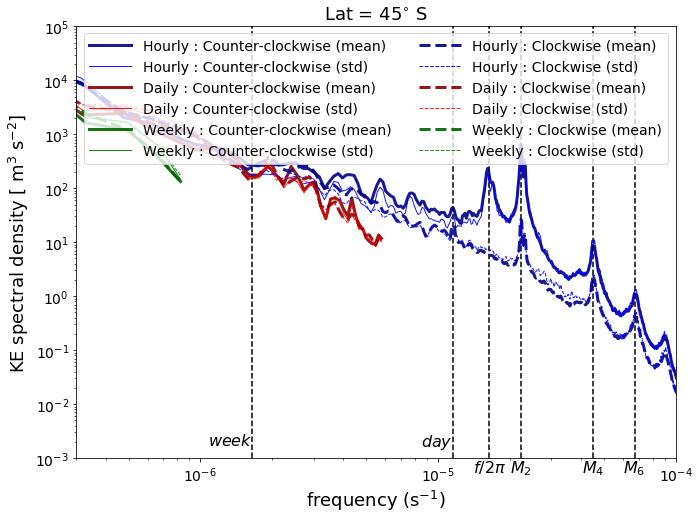

In [50]:
fig, ax = plt.subplots(figsize=(10,7.5))

colors3 =['darkblue','darkred', 'darkgreen']


psd_ccw_zonmean_h.plot(ax=ax, linewidth=3, alpha=0.9, color='darkblue', label='Hourly : Counter-clockwise (mean)',rasterized=True)
psd_ccw_std_h.plot(ax=ax, linewidth=1, alpha=0.9, color='blue', label='Hourly : Counter-clockwise (std)',rasterized=True)

psd_ccw_zonmean_d.plot(ax=ax, linewidth=3, alpha=0.9, color='darkred', label='Daily : Counter-clockwise (mean)',rasterized=True)
psd_ccw_std_d.plot(ax=ax, linewidth=1, alpha=0.9, color='red', label='Daily : Counter-clockwise (std)',rasterized=True)

psd_ccw_zonmean_w.plot(ax=ax, linewidth=3, alpha=0.9, color='darkgreen', label='Weekly : Counter-clockwise (mean)',rasterized=True)
psd_ccw_std_w.plot(ax=ax, linewidth=1, alpha=0.9, color='green', label='Weekly : Counter-clockwise (std)',rasterized=True)


psd_cw_zonmean_h.plot(ax=ax, linewidth=3, alpha=0.9, linestyle = '--', color='darkblue', label='Hourly : Clockwise (mean)', rasterized=True)
psd_cw_std_h.plot(ax=ax, linewidth=1, alpha=0.9, linestyle = '--', color='blue', label='Hourly : Clockwise (std)', rasterized=True)

psd_cw_zonmean_d.plot(ax=ax, linewidth=3, alpha=0.9, linestyle = '--', color='darkred', label='Daily : Clockwise (mean)', rasterized=True)
psd_cw_std_d.plot(ax=ax, linewidth=1, alpha=0.9, linestyle = '--', color='red', label='Daily : Clockwise (std)', rasterized=True)

psd_cw_zonmean_w.plot(ax=ax, linewidth=3, alpha=0.9, linestyle = '--', color='darkgreen', label='Weekly : Clockwise (mean)', rasterized=True)
psd_cw_std_w.plot(ax=ax, linewidth=1, alpha=0.9, linestyle = '--', color='green', label='Weekly : Clockwise (std)', rasterized=True)




ax.set_xscale('log')
ax.set_xlim(xlim)
ax.set_yscale('log')
ax.set_ylim(ylim)

lg = plt.legend(loc='upper center',ncol=2)

#ax.legend(loc='upper center', fontsize=13)
lg.draw_frame(True)
   
ax.vlines([week_freq, day_freq, f_freq, m2_freq, m4_freq, m6_freq], ylim[0], ylim[1], linestyle='dashed',rasterized=True)

ax.set_xlabel('frequency (s$^{-1}$)', fontsize = 18)
ax.set_ylabel(u'KE spectral density [ m$^{3}$ s$^{-2}$]', fontsize = 18)
ax.text(f_freq, ylim[0], r'$f/2\pi$', ha='center', va='top', fontsize = 16)
ax.text(m2_freq, ylim[0], r'$M_2$', ha='center', va='top', fontsize = 16)
ax.text(m4_freq, ylim[0], r'$M_4$', ha='center', va='top', fontsize = 16)
ax.text(m6_freq, ylim[0], r'$M_6$', ha='center', va='top', fontsize = 16)

ax.text(day_freq, ylim[0]+2e-3, r'$day$', ha='right', va='top', fontsize = 16)
ax.text(week_freq, ylim[0]+2e-3, r'$week$', ha='right', va='top', fontsize = 16)

ax.set_title(r'Lat = $45^{\circ}$ S', fontsize = 18)
plt.tight_layout()

fig.savefig(figdir+'Freq_PowSpec_hdw1_w_sd.pdf', dpi=200)

/home/as4479/new_miniconda/miniconda/envs/pangeo/lib/python3.6/site-packages/matplotlib/scale.py:114: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


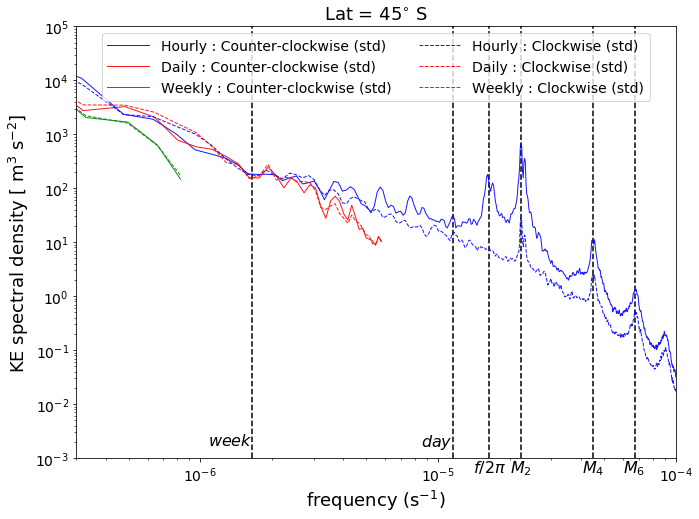

In [51]:
fig, ax = plt.subplots(figsize=(10,7.5))

colors3 =['darkblue','darkred', 'darkgreen']


psd_ccw_std_h.plot(ax=ax, linewidth=1, alpha=0.9, color='blue', label='Hourly : Counter-clockwise (std)',rasterized=True)

psd_ccw_std_d.plot(ax=ax, linewidth=1, alpha=0.9, color='red', label='Daily : Counter-clockwise (std)',rasterized=True)

psd_ccw_std_w.plot(ax=ax, linewidth=1, alpha=0.9, color='green', label='Weekly : Counter-clockwise (std)',rasterized=True)


psd_cw_std_h.plot(ax=ax, linewidth=1, alpha=0.9, linestyle = '--', color='blue', label='Hourly : Clockwise (std)', rasterized=True)

psd_cw_std_d.plot(ax=ax, linewidth=1, alpha=0.9, linestyle = '--', color='red', label='Daily : Clockwise (std)', rasterized=True)

psd_cw_std_w.plot(ax=ax, linewidth=1, alpha=0.9, linestyle = '--', color='green', label='Weekly : Clockwise (std)', rasterized=True)




ax.set_xscale('log')
ax.set_xlim(xlim)
ax.set_yscale('log')
ax.set_ylim(ylim)

lg = plt.legend(loc='upper center',ncol=2)

#ax.legend(loc='upper center', fontsize=13)
lg.draw_frame(True)
   
ax.vlines([week_freq, day_freq, f_freq, m2_freq, m4_freq, m6_freq], ylim[0], ylim[1], linestyle='dashed',rasterized=True)

ax.set_xlabel('frequency (s$^{-1}$)', fontsize = 18)
ax.set_ylabel(u'KE spectral density [ m$^{3}$ s$^{-2}$]', fontsize = 18)
ax.text(f_freq, ylim[0], r'$f/2\pi$', ha='center', va='top', fontsize = 16)
ax.text(m2_freq, ylim[0], r'$M_2$', ha='center', va='top', fontsize = 16)
ax.text(m4_freq, ylim[0], r'$M_4$', ha='center', va='top', fontsize = 16)
ax.text(m6_freq, ylim[0], r'$M_6$', ha='center', va='top', fontsize = 16)

ax.text(day_freq, ylim[0]+2e-3, r'$day$', ha='right', va='top', fontsize = 16)
ax.text(week_freq, ylim[0]+2e-3, r'$week$', ha='right', va='top', fontsize = 16)

ax.set_title(r'Lat = $45^{\circ}$ S', fontsize = 18)
plt.tight_layout()

fig.savefig(figdir+'Freq_PowSpec_hdw1_sd.pdf', dpi=200)

/home/as4479/new_miniconda/miniconda/envs/pangeo/lib/python3.6/site-packages/matplotlib/scale.py:114: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


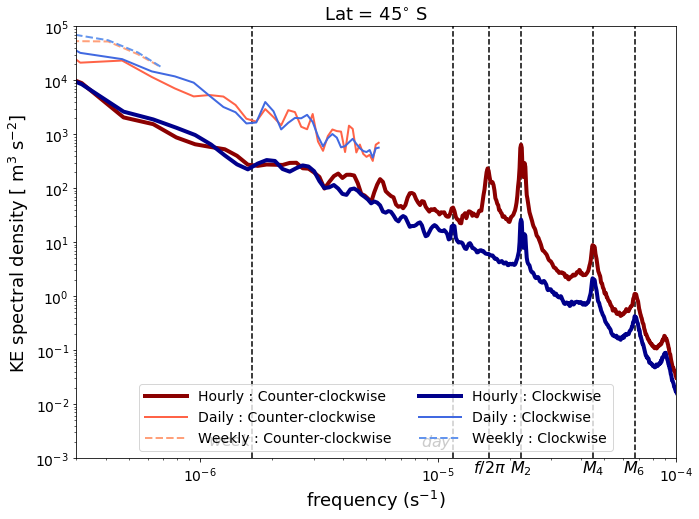

In [36]:
fig, ax = plt.subplots(figsize=(10,7.5))

colors3 =['darkblue','darkred', 'darkgreen']


psd_ccw_zonmean_h.plot(ax=ax, linewidth=4, color='darkred', label='Hourly : Counter-clockwise',rasterized=True)
#ax.fill_between(psd_h.psd_ccw.freq_time, psd_ccw_p_h, psd_ccw_m_h, edgecolor=None, facecolor='darkred', alpha=0.15, rasterized=True)

(psd_ccw_zonmean_d*(73.**2.)).plot(ax=ax, linewidth=2, color='tomato', label='Daily : Counter-clockwise',rasterized=True)
#ax.fill_between(psd_d.psd_ccw.freq_time, psd_ccw_p_d, psd_ccw_m_d, edgecolor=None, facecolor='tomato', alpha=0.15, rasterized=True)

(psd_ccw_zonmean_w*(73.**2. * 11.**2.)).plot(ax=ax, linewidth=2, linestyle = '--',color='lightsalmon', label='Weekly : Counter-clockwise',rasterized=True)
#ax.fill_between(psd_w.psd_ccw.freq_time, psd_ccw_p_w, psd_ccw_m_w, edgecolor=None, facecolor='lightsalmon', alpha=0.15, rasterized=True)


psd_cw_zonmean_h.plot(ax=ax, linewidth=4, color='darkblue', label='Hourly : Clockwise', rasterized=True)
#ax.fill_between(psd_h.psd_cw.freq_time, psd_cw_p_h, psd_cw_m_h, edgecolor=None, facecolor='darkblue', alpha=0.15, rasterized=True)

(psd_cw_zonmean_d*(73.**2.)).plot(ax=ax, linewidth=2, color='royalblue', label='Daily : Clockwise', rasterized=True)
#ax.fill_between(psd_d.psd_cw.freq_time, psd_cw_p_d, psd_cw_m_d, edgecolor=None, facecolor='royalblue', alpha=0.15, rasterized=True)

(psd_cw_zonmean_w*(73.**2. * 11.**2.)).plot(ax=ax, linewidth=2, linestyle = '--', color='cornflowerblue', label='Weekly : Clockwise', rasterized=True)
#ax.fill_between(psd_w.psd_cw.freq_time, psd_cw_p_w, psd_cw_m_w, edgecolor=None, facecolor='cornflowerblue', alpha=0.15, rasterized=True)




ax.set_xscale('log')
ax.set_xlim(xlim)
ax.set_yscale('log')
ax.set_ylim(ylim)

lg = plt.legend(loc='lower center',ncol=2)

#ax.legend(loc='upper center', fontsize=13)
lg.draw_frame(True)
   
ax.vlines([week_freq, day_freq, f_freq, m2_freq, m4_freq, m6_freq], ylim[0], ylim[1], linestyle='dashed',rasterized=True)

ax.set_xlabel('frequency (s$^{-1}$)', fontsize = 18)
ax.set_ylabel(u'KE spectral density [ m$^{3}$ s$^{-2}$]', fontsize = 18)
ax.text(f_freq, ylim[0], r'$f/2\pi$', ha='center', va='top', fontsize = 16)
ax.text(m2_freq, ylim[0], r'$M_2$', ha='center', va='top', fontsize = 16)
ax.text(m4_freq, ylim[0], r'$M_4$', ha='center', va='top', fontsize = 16)
ax.text(m6_freq, ylim[0], r'$M_6$', ha='center', va='top', fontsize = 16)

ax.text(day_freq, ylim[0]+2e-3, r'$day$', ha='right', va='top', fontsize = 16)
ax.text(week_freq, ylim[0]+2e-3, r'$week$', ha='right', va='top', fontsize = 16)

ax.set_title(r'Lat = $45^{\circ}$ S', fontsize = 18)
plt.tight_layout()

#fig.savefig(figdir+'Freq_PowSpec_hdw.pdf', dpi=200)

In [77]:

lat = -45.0
    
omega = 7.2921e-5
f_freq = np.abs((2 * omega) * np.sin(np.radians(lat)) / (2*np.pi))
    
m2_freq = (12.4206012 * (60*60))**-1
m4_freq = (6.210300601* (60*60))**-1
m6_freq = (4.140200401* (60*60))**-1
day_freq = (24*60*60.)**-1
week_freq = (7*24*60*60.)**-1

hour_freq = (60*60.)**-1

psd_cw_zonmean_h = np.log10(psd_h.psd_cw.mean(dim=['XC']))
psd_ccw_zonmean_h = np.log10(psd_h.psd_ccw.mean(dim=['XC']))

psd_cw_std_h = np.log10(psd_h.psd_cw).std(dim=['XC'])
psd_ccw_std_h = np.log10(psd_h.psd_ccw).std(dim=['XC'])

psd_ccw_ps_h = psd_ccw_zonmean_h + psd_ccw_std_h
psd_ccw_ms_h = psd_ccw_zonmean_h - psd_ccw_std_h
psd_cw_ps_h = psd_cw_zonmean_h + psd_cw_std_h
psd_cw_ms_h = psd_cw_zonmean_h - psd_cw_std_h


psd_cw_zonmean_d = np.log10(psd_d.psd_cw.mean(dim=['XC']))
psd_ccw_zonmean_d = np.log10(psd_d.psd_ccw.mean(dim=['XC']))

psd_cw_std_d = np.log10(psd_d.psd_cw).std(dim=['XC'])
psd_ccw_std_d = np.log10(psd_d.psd_ccw).std(dim=['XC'])

psd_ccw_ps_d = psd_ccw_zonmean_d + psd_ccw_std_d
psd_ccw_ms_d = psd_ccw_zonmean_d - psd_ccw_std_d
psd_cw_ps_d = psd_cw_zonmean_d + psd_cw_std_d
psd_cw_ms_d = psd_cw_zonmean_d - psd_cw_std_d



psd_cw_zonmean_w = np.log10(psd_w.psd_cw.mean(dim=['XC']))
psd_ccw_zonmean_w = np.log10(psd_w.psd_ccw.mean(dim=['XC']))

psd_cw_std_w = np.log10(psd_w.psd_cw).std(dim=['XC'])
psd_ccw_std_w = np.log10(psd_w.psd_ccw).std(dim=['XC'])


psd_ccw_ps_w = psd_ccw_zonmean_w + psd_ccw_std_w
psd_ccw_ms_w = psd_ccw_zonmean_w - psd_ccw_std_w
psd_cw_ps_w = psd_cw_zonmean_w + psd_cw_std_w
psd_cw_ms_w = psd_cw_zonmean_w - psd_cw_std_w


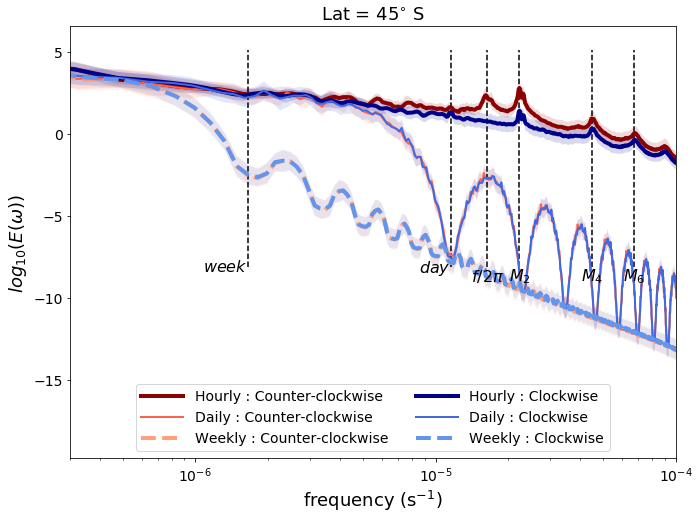

In [86]:
#ylim=[-8.1,5.1]
xlim=[3e-7, 1e-4]

fig, ax = plt.subplots(figsize=(10,7.5))


colors3 =['darkblue','darkred', 'darkgreen']


psd_ccw_zonmean_h.plot(ax=ax, linewidth=4, color='darkred', label='Hourly : Counter-clockwise',rasterized=True)
ax.fill_between(psd_h.psd_ccw.freq_time, psd_ccw_ps_h, psd_ccw_ms_h, edgecolor=None, facecolor='darkred', alpha=0.15, rasterized=True)

psd_ccw_zonmean_d.plot(ax=ax, linewidth=2, color='tomato', label='Daily : Counter-clockwise',rasterized=True)
ax.fill_between(psd_d.psd_ccw.freq_time, psd_ccw_ps_d, psd_ccw_ms_d, edgecolor=None, facecolor='tomato', alpha=0.15, rasterized=True)

psd_ccw_zonmean_w.plot(ax=ax, linewidth=4, linestyle = '--',color='lightsalmon', label='Weekly : Counter-clockwise',rasterized=True)
ax.fill_between(psd_w.psd_ccw.freq_time, psd_ccw_ps_w, psd_ccw_ms_w, edgecolor=None, facecolor='lightsalmon', alpha=0.15, rasterized=True)


psd_cw_zonmean_h.plot(ax=ax, linewidth=4, color='darkblue', label='Hourly : Clockwise', rasterized=True)
ax.fill_between(psd_h.psd_cw.freq_time, psd_cw_ps_h, psd_cw_ms_h, edgecolor=None, facecolor='darkblue', alpha=0.15, rasterized=True)

psd_cw_zonmean_d.plot(ax=ax, linewidth=2, color='royalblue', label='Daily : Clockwise', rasterized=True)
ax.fill_between(psd_d.psd_cw.freq_time, psd_cw_ps_d, psd_cw_ms_d, edgecolor=None, facecolor='royalblue', alpha=0.15, rasterized=True)

psd_cw_zonmean_w.plot(ax=ax, linewidth=4, linestyle = '--', color='cornflowerblue', label='Weekly : Clockwise', rasterized=True)
ax.fill_between(psd_w.psd_cw.freq_time, psd_cw_ps_w, psd_cw_ms_w, edgecolor=None, facecolor='cornflowerblue', alpha=0.15, rasterized=True)




ax.set_xscale('log')
ax.set_xlim(xlim)
#ax.set_yscale('log')
#ax.set_ylim(ylim)
#kp = np.array([-2,0,2,4])
#lp=['$10^{-2}$','$10^{0}$','$10^{2}$','$10^{4}$' ]
#ax.set_yticks(kp)
#ax.set_yticklabels(lp)

lg = plt.legend(loc='lower center',ncol=2)

#ax.legend(loc='upper center', fontsize=13)
lg.draw_frame(True)
   
ax.vlines([week_freq, day_freq, f_freq, m2_freq, m4_freq, m6_freq], ylim[0], ylim[1], linestyle='dashed',rasterized=True)

ax.set_xlabel('frequency (s$^{-1}$)', fontsize = 18)
#ax.set_ylabel(u'KE spectral density [ m$^{3}$ s$^{-2}$]', fontsize = 18)
ax.set_ylabel(u'$log_{10}(E(\omega))$', fontsize = 18)

ax.text(f_freq, ylim[0], r'$f/2\pi$', ha='center', va='top', fontsize = 16)
ax.text(m2_freq, ylim[0], r'$M_2$', ha='center', va='top', fontsize = 16)
ax.text(m4_freq, ylim[0], r'$M_4$', ha='center', va='top', fontsize = 16)
ax.text(m6_freq, ylim[0], r'$M_6$', ha='center', va='top', fontsize = 16)

ax.text(day_freq, ylim[0]+.5, r'$day$', ha='right', va='top', fontsize = 16)
ax.text(week_freq, ylim[0]+.5, r'$week$', ha='right', va='top', fontsize = 16)



ax.set_title(r'Lat = $45^{\circ}$ S', fontsize = 18)
plt.tight_layout()
#fig.savefig(figdir+'Freq_PowSpec_hdw3.pdf', dpi=200)